In [2]:
#1차원 이산확률분포 -> 동전던지기 앞 뒤면
import numpy as np
import matplotlib.pyplot as plt

x_set = np.array([1,2,3,4,5,6]) # 불균형 주사위 

def f(x): # 사용자 함수 정의
    if x in x_set: # 리스트배열에 파라미터가 있다면
        return x/21 # 불균형하게 리턴
    else:
        return 0
X =[x_set, f]

In [4]:
prob = np.array([f(x_k) for x_k in x_set]) # 확률함수 만들어줌
print(prob, '\n')
dict(zip(x_set, prob)) # 집함수써서 각각의 확률변수에 대해 확률 구함  key,value 형태

[0.04761905 0.0952381  0.14285714 0.19047619 0.23809524 0.28571429] 



{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

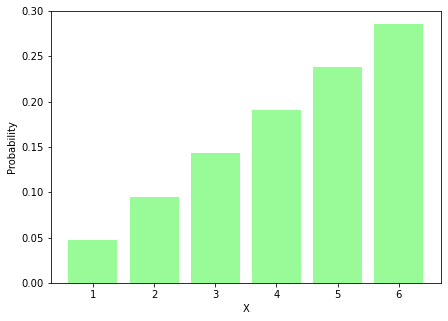

In [5]:
plt.figure(figsize=(7,5))
plt.bar(x_set,prob,color='palegreen')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

Text(0.5, 1.0, 'bar garph')

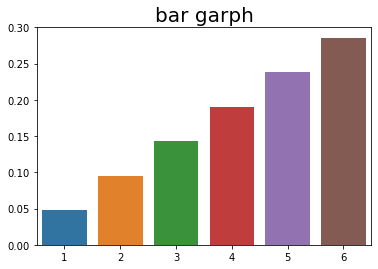

In [6]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.barplot(x_set,prob)
plt.title('bar garph',fontsize=20)

In [7]:
# np.all은 모든 요소가 참일 때만 참을 반환하는 함수
np.all(prob>=0) # 확률이란것은 모두 0보다 크거나 같아야함

True

In [8]:
np.sum(prob) # 그 합계는 항상 1

0.9999999999999999

In [9]:
# 확률함수는 확률변수 X가 X가 될 때의 확률을 반환하는 함수 이지만, 확률변수 X가 x이하가 될때의 확률을 반환하는 함수로도 자주 사용됨
# 누적분포함수 -> 특정확률변수까지의 합계
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
F(6)  # 확률변수 끝에 있는 6까지 하면 1로 가까워짐

0.9999999999999999

In [11]:
# 확률변수의 변환: 확률변수 X에 2를 곱하고 3을 더한 2X + 3도 확률변수가 된다.
# 확률변수 x를 변환해도 확률변수가 된다
y_set = np.array([2* x_k +3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set , prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [12]:
# 1차원 이산형 확률변수의 지표
# 평균 : 확률변수의 평균은 확률변수의 중심을 나타내는 지표가 되며 기댓값이라고도 부름
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [13]:
# 확률변수의 기댓값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.332711

In [15]:
# 일반화를 통해가지고 기댓값의 선형성을 확인
def E(X,g=lambda x :x):
    x_set, f = X 
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [16]:
E(X)

4.333333333333333

In [17]:
E(X , g=lambda x: 2*x+3) # 즉 2x+3으로 변환해서 구한 기댓값과

11.666666666666664

In [18]:
# 기댓값의 선형성 확인
2 * E(X) + 3 # x의 기대값을 가지고 구한것과 동일

11.666666666666666

In [19]:
# 분산
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [20]:
#일반화
def V(X, g = lambda x:x):
    x_set,f = X
    mean = E(X,g)
    return np.sum([(g(i)-mean)**2 *f(i) for i in x_set])

V(X, lambda x:2*x+3)

8.88888888888889

In [21]:
#분산의 공식 -> square한것이므로 풀어서는 2의 자승을 해줘야함
2*2*V(X) # 상수는 제외

8.88888888888889

In [26]:
# 2차원 이산형 확률분포 
x_set = np.arange(2,13)  # 두개의 확률변수가 동시에 작동-> 결합확률분포의 경우
y_set = np.arange(1,7)

In [27]:
def f_XY(x,y):
    if 1 <=y <=6 and 1 <= x-y <=6:
        return y*(x-y)/441 # 441은 21의 자승
    else:
        return 0

In [28]:
XY=[x_set,y_set, f_XY] # 결합확률함수와 x확률변수 y확률 변수를 x,y에 저장해놓고 그림을 그려줌

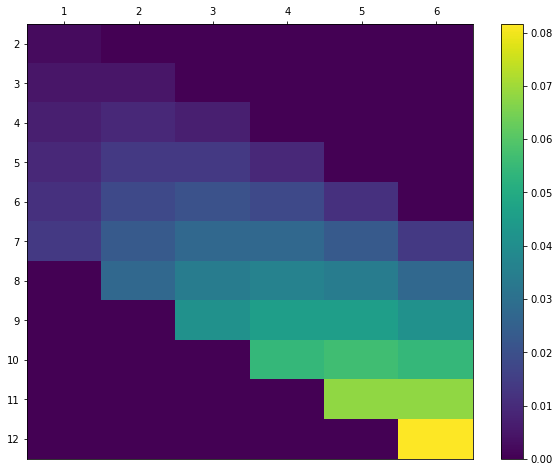

In [30]:
prob = np.array([[f_XY(x_i,y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
x = ax.pcolor(prob)

ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7) , minor=False)
ax.set_yticklabels(np.arange(2,13) , minor=False)

# y축을 내림차순으로 역전
ax.invert_yaxis()

# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax) # 두개의 변수의 결합확률이 어떻게 작용하는지 살펴봄
# 밝은색이 확률 높음 -> 12와 6일 때 높음
# 1과 2일때가 제일 적음

In [31]:
np.all(prob >=0)  # 역시 확률은 0보다 크거나 같고

True

In [32]:
np.sum(prob)  # 모두의 합은 1

1.0

In [33]:
# 주변확률분포 : 확률변수 (X,Y)는 결합확률분포에 의해 동시에 정의되지만 개별 확률변수에만 흥미가 있을 수 있다.
# 확률변수 X만의 움직임 즉 확률변수 X의 확률함수를 알고 싶은 상황
def f_X(x):
    return np.sum(f_XY(x,y_k) for y_k in y_set)

In [34]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [35]:
X = [x_set, f_X] # x의 확률변수와 그때의 확률함수
Y = [y_set, f_Y] # y의 확률변수와 그때의 확률함수

In [36]:
X # x의 확률변수와 그때의 각각의 개별 확률함수가 출력

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <function __main__.f_X(x)>]

In [37]:
Y # y의 확률변수와 그때의 각각의 개별 확률함수가 출력

[array([1, 2, 3, 4, 5, 6]), <function __main__.f_Y(y)>]

Text(0, 0.5, 'probability')

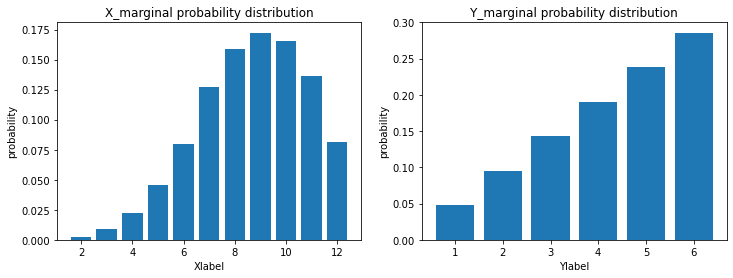

In [38]:
# 그걸 가지고 그림을 그려보면 x확률변수에 대응되는 확률함수에서 구해지는 확률과
# y확률변수에 대응되는 확률함수에서 구해지는 확률과의 대응되는 그림을 볼 수 있음
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize =(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set,prob_x)
ax2.bar(y_set,prob_y)

ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('Xlabel')
ax1.set_ylabel('probability')

ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Ylabel')
ax2.set_ylabel('probability')

In [39]:
# 2차원 이산형 확률분포의 지표
# 기댓값 
np.sum([x_i * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [40]:
sum=0
for y_j in y_set:
    for x_i in x_set:
        sum+=((x_i*f_XY(x_i,y_j)))
sum

8.666666666666666

In [41]:
def E(XY, g):
    x_set,y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])
mean_X=E(XY,lambda x,y:x)
mean_X

8.666666666666666

In [42]:
E(XY,lambda x,y:y) * mean_X

37.55555555555555

In [43]:
np.sum([x_i  * y_j * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

39.77777777777778

In [44]:
a,b =2,3

In [45]:
# 기댓값의 선형성
E(XY , lambda x,y: a*x+ b*y)

30.333333333333332

In [46]:
# 분산 : X의 분산이라면 X관한 편차제곱의 기댓값으로 구할 수 있다.
np.sum([(x_i - mean_X)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

In [47]:
def V(XY, g ):
    x_set,y_set, f_XY = XY
    mean = E(XY , g)
    return np.sum([(g(x_i,y_j) - mean)**2 * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set])
V(XY,lambda x,y:y)

2.2222222222222223

In [48]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_Y = E(XY, lambda x,y: y)
    mean_X = E(XY, lambda x,y: x)
    return np.sum([(x_i -mean_X) * (y_j - mean_Y) * f_XY(x_i,y_j) for x_i in x_set for y_j in y_set ])

In [49]:
cov_xy=Cov(XY)

In [50]:
V(XY, lambda x,y:a*x+b*y)

64.44444444444444

In [51]:
var_X = V(XY, lambda x,y:x)
var_Y = V(XY, lambda x,y:y)

In [52]:
# 분산과 공분산의 공식
a**2 * var_X + b**2 * var_Y + 2*a*b *cov_xy

64.44444444444443

In [53]:
# 확률변수의 상관계수 : 공분산을 각각의 표준편차로 나누어 산출
cov_xy/np.sqrt(var_X * var_Y)

0.7071067811865474

## 대표적인 이산형 확률분포
   - 베르누이 분포
   - 이항분포
   - 기하분포
   - 포아송 분포

In [54]:
# 그래프를 위한 사용자 함수
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

linestyles = ['-','--',':']

def E(X,g=lambda x:x):
    x_set, f =X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
    x_set, f =X
    mean_X = E(X,g)
    return np.sum([(g(x_k)-mean_X)**2 *f(x_k) for x_k in x_set])

def check_prob(X):  # 확률분포를 인수로 가지면 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), f'minus probability'    # 조건식이 True 가 아니면 문구 출력
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X): .4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X): # 확률분포를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label ='prob', color='lightsteelblue')
    ax.vlines(E(X), 0, 1, label='mean', color='slateblue')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()

### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라 하며 1이 나오면 성공, 0이 나오면 실패
- 동전을 던져 앞면이 나올 확률, 주사위를 한번 굴려 6이 나오지 않을 확률

In [55]:
# 파라미터를 정하면 확률분포가 확정되므로 파라미터 p를 인수로 취하고 x_set와 f를 반환하는 함수로 구현
def Bern(p):
    x_set = np.array([0,1]) # 확률변수가 취할 수 있는 값이 0과 1
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x) # 수식
        else:
            return 0
    return x_set, f

In [65]:
# Bern(0.3)을 따르는 확률변수 x를 작성
p = 0.3 # 성공할 확률이 0.3
X = Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [66]:
# 기댓값과 분산 계산 
# 기댓값 0.3
# 분산 0.3 * 0.7 = 0.21 
check_prob(X)

expected value  0.3
variance 0.21


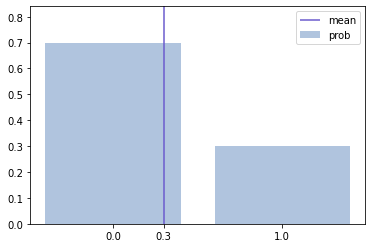

In [67]:
# 확률변수 x를 그리면 중앙의 세로선이 확률변수 x의 기댓값을 나타내고 있음
plot_prob(X)

In [58]:
# scipy stats를 사용하여 구현
# scipy.stats에는 베르누이 분포를 따르는 확률변수를 생성할 수 있는 bernoulli 함수가 존재
# bernoulli 함수는 인수로 파라미터 p를 취하고 Bern(p)를  따르는 fv_frozen object를 반환
rv = stats.bernoulli(p)

In [59]:
# 확률질량함수(probability mass function)
rv.pmf(0) , rv.pmf(1) # 0과 1을 각각 넘겨주면 그 값을 취하는 확률이 반환

(0.7, 0.3)

In [60]:
rv.pmf([0,1]) # 인수로 리스트를 넘길 수 있음 -> 리스트의 각 요소에 대한 확률이 저장된 Numpy의 array가 반환

array([0.7, 0.3])

In [61]:
# 누적밀도함수(cumulative distribution function)
rv.cdf([0,1]) # 인수로 리스트를 넘겨 줄 수 있음

array([0.7, 1. ])

In [62]:
# 기댓값, 분산
rv.mean(), rv.var() 

(0.3, 0.21)

# 이항분포
- 성공확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포
- 성공하는 횟수는 0부터 n번까지이므로, 확률변수가 취할 수 있는 값은 {0,1,..n}
- 성공확률 p는 0 <= p <= 1 시행횟수 n은 1이상인 정수여야 함
f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)0                (otherwise)


In [70]:
# 조합을 계산할 때는 scipy.special에 있는 comb함수 
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            
            return comb(n,x) * p **x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [71]:
# Bin(10,0.3)을 따르는 확률변수 X
n = 10 # 전체 시행 횟수
p = 0.3 # 성공확률
X = Bin(n,p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [72]:
check_prob(X)
# 기댓값 10 * 3 = 3
# 분산 10 * 3 * 0.7 = 2.1 


expected value  3.0
variance 2.1


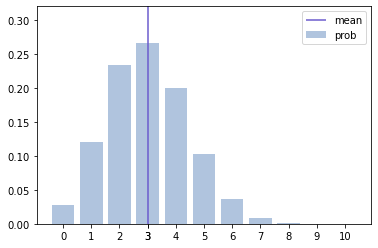

In [75]:
# 이항분포는 기댓값이 정상이 되는 산 모양의 분포를 이룬다
plot_prob(X)

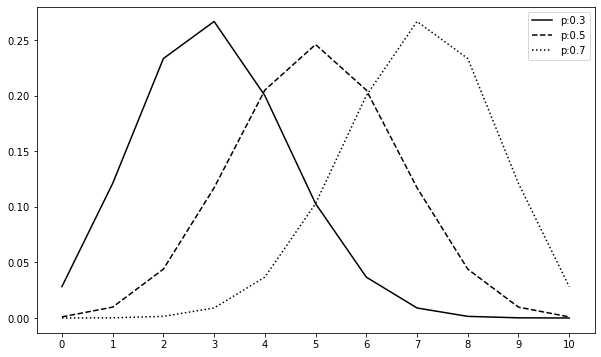

In [77]:
# scipy.stats에서 이항분포의 확률변수는 binom함수로 생성할 수 있다
# n을 10으로 고정하고 p를 0.3, 0.5, 0.7로 변화시켜 이항분포가 어떠한 형태가 되는지 관찰
# n 인수는 전체 시행 횟수 p는 베르누이 확률분포의 기댓값
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p ,ls in zip([0.3 ,0.5, 0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='k')
    
ax.set_xticks(x_set)
ax.legend()
plt.show()
# p가 커질수록, 정상이 되는 값이 커집니다. 또한 p=0.5일 때 좌우대칭 형태로 분포하고,
# p = 0.3과 p = 0.7 대칭 관계에 있다는 것을 확인

# 기하분포
- 베르누이 시행에서 처음 성공할때까지 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기

f(x) = $(1-p)^{x-1}p$ $(x \in \{1,2,3,/,,,\})$
         0                  otherwise
    
- 기하분포의 기댓값과 분산 : E(x) = 1/p , V(x) = (1-p)/p^2

#### 위키
- 베르누이 시행에서 처음 성공까지 시도한 횟수 X의 분포. 지지집합은 {1, 2, 3...}이다.
- 베르누이 시행에서 처음 성공할 때까지 실패한 횟수 Y=X-1의 분포. 지지집합은 {0, 1, 2, ...}이다.
- 성공확률 p인 베르누이 시행에 대해, n번 시행시 첫 번째 성공을 얻을 확률

    * 예시) 어떤 사람이 운전시험에 합격할 확률을 0.5라할 때 적어도 3번안에 시험에서 합격할 확률은?
        * (1-0.5)^(3-1) * 0.5  = 0.125 

In [82]:
# [과제] 사용자 함수를 구하세요.(단, 확를변수를 1 이상 29 이하인 정수으로 설정)
def Ge(p):
    x_set=np.arange(1,30)
    def f(x):
        if x in x_set:
            return (1-p)**(x-1) * p
        else:
            return 0
    return x_set, f

In [84]:
# [과제] 성공확률이 0.5일때 기하분포의 기댓값과 분산을 구하세요.
p = 0.5      # p는 베르누이시행의 성공확률파라미터
X = Ge(p)
print("기하분포의 기댓값: ", 1/0.5)    #기하분포의 기댓값은 1/p
print("기하분포의 분산: ", (1-0.5)/0.5**2)   #분산은 (1-p)/p^2

기하분포의 기댓값:  2.0
기하분포의 분산:  2.0


In [85]:
check_prob(X)
# 기댓값 2
# 분산 2

expected value  2.0
variance 2.0


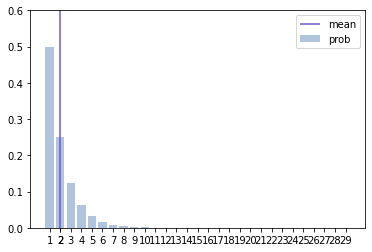

In [86]:
# 상기 기하분포의 확률함수와 기댓값을 시각화 하세요.
# check_prob(X)
plot_prob(X)       # 확률변수값이 커질수록 확률은 지수적으로 감소
# 11 이상인 값을 취하는 확률은 거의 0이 되므로 그래프에서 확인이 어렵다

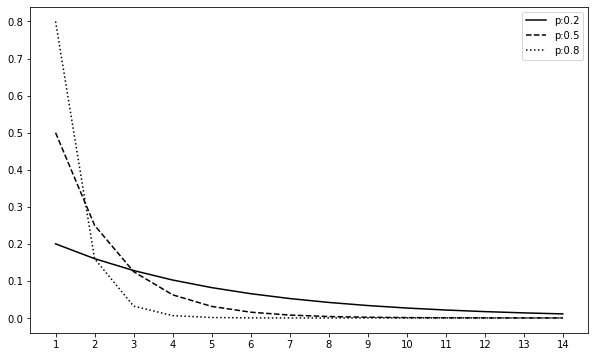

In [87]:
# scipy.stats에서 기하분포는 geom 함수로 생성할 수 있음
# 파라미터 p가 0.2 0.5 0.8일때의 기하분포 -> 성공확률이 0.2, 0.5, 0.8로 변할 때 확률함수가 변화는 모습을 시각화 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p ,ls in zip([0.2 ,0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='k')
    
ax.set_xticks(x_set)
ax.legend()
plt.show() 
# 성공확률이 클수록 초반에 '성공'할 확률이 높고, 성공확률이 작을 수록 초반에 '성공' 확률이 낮다
# 파라미터 p가 무엇이든지 간에, 값이 커질수록 확률이 지수적으로 감소하는 분포가 되는 것을 확인

expected value  2.0
variance 2.0


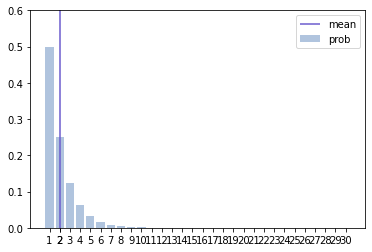

In [88]:
# 어떤 사람이 운전시험에 합격할 확률을 0.5라할 때 기댓값, 분산, 기하분포 그래프
def Ge_1(p): # 사용자함수 기하분포
    x_set = np.arange(1,31)
    def f(x):
        if x in x_set:
            return p*((1-p)**(x-1)) # 수식
        else:
            return 0
    return x_set, f

p = 0.5 # 합격할 확률
X = Ge_1(p)

plot_prob(X) 
check_prob(X)

In [89]:
# 빨간공7개 검정공3개가 주머니에 있을때 검정이면 성공 빨강이면 실패
# 이때 1번만에 성공할 확률
0.3*(1-0.3)**(1-1)

0.3

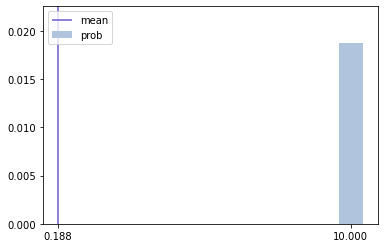

In [90]:
def Ge_1(p):
    x_set= [10]
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f
p=0.25
X=Ge_1(p)
plot_prob(X)  

#### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생건수는 Poi(2)를 따른다.
- 하루에 한번도 교통사고가 발생하지 않은 확률:  
P(X=0) = 2!/0! * $e^{-2}$ = 0.135
- 포아송 분포의 기댓값과 분산은 모두 $\lambda$가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

In [ ]:
# [과제] 사용자 함수를 구하세요.(단, 확를변수를 1 이상 19 이하인 정수으로 설정)
import math

def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return (lam**x) / (math.factorial(x)) * 1/(2.71828182846)**(lam)
        else:
            return 0
    return x_set , f

In [91]:
# 팩토리얼 x!은 scipy.special의 factorial을 사용 
# 취할 수 있는 값은 0 이상인 정수 전부지만 구현의 편의상 19 이하인 정수로 설정
from scipy.special import factorial

def Poi(lam):
    x_set=np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) *np.exp(-lam)
        else:
            return 0
    return x_set , f

In [92]:
lam = 3
X = Poi(lam)

In [93]:
# [과제] 𝜆 가 0.3일때 포아송분포의 기댓값과 분산을 구하세요.
X= Poi(3)
# Poi_E = np.sum(x_i * f(x_i) for x_i in x_set)
# print("포아송 분포의 기댓값: ",Poi_E)
# print("포아송 분포의 분산: ",np.sum((x_i - Poi_E)**2 * f(x_i) for x_i in x_set))
check_prob(X)
# 기댓값 분산 모두 3

expected value  3.0
variance 3.0


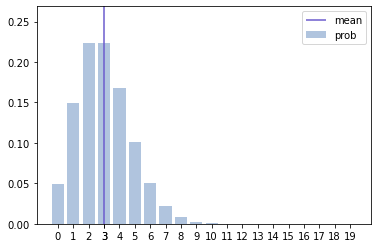

In [95]:
# [과제] 상기 포아송분포의 확률함수와 기댓값을 시각화 하세요.
plot_prob(X)
# 포아송 분포도 이항분포와 마찬가지로 기댓값이 정상이 되는 산의 형태

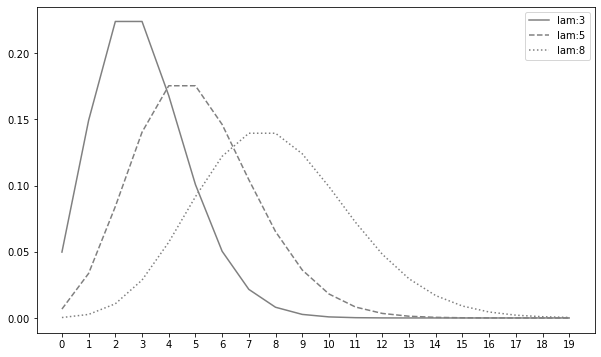

In [102]:
# scipy.stats에서 포아송 분포는 poisson 함수로 생성 가능
# 파라미터 lambda를 3, 5, 8로 변화시킬 때 포아송 분포의 형태를 그림으로
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set), label=f'lam:{lam}', ls=ls,color='gray')
    
ax.set_xticks(x_set)
ax.legend()

plt.show()
# 어떠한 파라미터라도 분포의 정상에는 람다가 있고 람다가 커질수록 경사면이 더욱 완만해지는 것을 확인

In [ ]:
# [과제] 베르누이, 이항, 기하, 포아송분포의 사례를 각각 2개씩 제시 및 설명 하세요
# 베르누이
# 빨간공7개 검정공3개가 주머니에 있을때 빨강이면 성공 검정이면 실패
# 게임에서 강화성공이 뜰 확률 10% 아닐확률 90%

# 이항분포
# 4지선다형 문제 5개에서 임의로 답을 선택할때 정답을 선택한 문제수
# 게임에서 강화성공이 뜰 확률 10% 아닐확률 90% 에서 10번돌렸을때 성공할 횟수

# 기하분포
# 어느 야구선수가 홈런 칠 확률은 0.05라고 한다. 이 야구선수가 6타석만에 홈런칠 확률은?
# 어떤 사람이 운전시험에 합격할 확률을 0.25라할 때 적어도 3번안에 시험에서 합격할 확률은?

# 포아송 분포
# 고객상담 부서의 1시간 평균 상담건수는 240건일때 1분동안 상담요청 건수가 2건 들어올 경우
# 일일 평균매출이 100만 일때 1시간당 매출이 30일 확률

### 연속형 확률변수
- 이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다.<br><br>
- 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral모듈을 사용하여 구현한다.<br><br>
- 이산형은 값이 딱 떨어지는 것, 연속형은 딱 떨어지지 않음 범위에 대한 면적을 구하는 것

### 연속형 확률분포와 확률밀도함수
- 특정값이 될 확률은 0이란것은 값이 딱 끊어지지 않기 때문이다.<br><br>
- 특정 값이 범위에 들어갈 확률은 확률밀도함수를 적분하여 계산(적분은 곡선 아래 면적의 크기)<br><br>
- x의 변화가 무한소 0으로 가기 때문에 면적은 높이와 같다.<br><br>
- 정규분포는 연속확률분포로 가장 자주 쓰이는 확률분포, 모양은 평균을 중심으로 하나의 봉우리 형태를 띄며 한 집단의 많은 사람들의 키, 몸무게, 시험성적 등의 데이터에 잘 나타나는 분포-> 평균이 가장 정점
    - 표준 정규분포, t분포가 정규분포에 속함
    - 모집단의 분산을 모르는 경우 t분포, 샘플이 자유도로 표현할 수 있는데 수가 30개 미만이면 t분포  그 이상은 표준정규분포 씀 -> 이 분류는 절대적 기준이 아닌 통계적 가이드임<br><br>
- 누적분포함수(cumulative density function) :연속형 확률분포에 대한 확률 밀도함수를 누적으로 표현한 것
    * 확률분포에서 얻은 확률변수(퍼센트포인트) 3 이하가 되는 확률
    * stats.norm.cdf(loc=4,scale=0.8,x=3)<br><br>
- 정규분포의 확률밀도(Probability density function) 계산
    * 확률변수 3일 때의 확률밀도 N(3|4, 0.8**2) 
    * stats.norm.pdf(loc=4,scale=0.8,x=3)<br><br>
- 하측확률 : '확률변수 x가 N보다 낮을 확률은 M퍼센트이다'에서 N을 고정하고 M을 구하는 경우
    * 이 때의 M이 하측확률이며 M(확률)을 고정하고 N(변수)을 구하는 경우
    * 이때의 N이 퍼센트포인트 하측확률이 2.5%가 되는 퍼센트 포인트<br><br>
    
- 확률밀도함수(probability density function)
    * stats.norm.pdf(x=x)로 하여 loc와 scale을 지정하지 않을 경우 표준정규분포가 됨.<br><br>
- 정규확률분포로 부터 난수 생성
    * stats.norm.rvs(size = 4, random_state = 50) -> 정규확률분포를 따르는 4개 난수생성, random_stata 인자로 초기값 고정
    * 평균 loc 0, 표준편차 scale 1 -> 정규확률 샘플 구하는것

# 요약
- Python에서 scipy.stats 패키지를 이용해 정규확률분포에 대한 함수를 사용할 수 있음.

- 정규확률분포는 norm.함수명을 사용.

- 정규확률밀도함수는 norm.pdf()함수를사용함.

- 정규누적확률밀도함수는 norm.cdf()함수를 사용함.

- 정규확률분포의 분위수는 norm.ppf()함수를 사용함.

- 정규확률분포의 랜덤난수생성은 norm.rvs()함수를 사용함.

- 랜덤난수를 생성할 때, norm.rvs() 함수의 random_state 인자로 초기값을 고정할 수 있음.

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import stats
import scipy as sp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, '확률밀도함수')

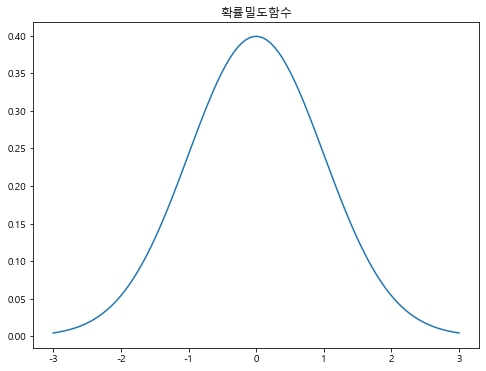

In [104]:
from matplotlib import rc
rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

rv = stats.norm(loc=0,scale=1)
xx = np.linspace(-3,3,100)
pdf = rv.pdf(xx)

plt.figure(figsize=(8,6))
plt.plot(xx,pdf)
plt.title('확률밀도함수')
# 평균4를 정점으로해서 좌우대칭인 종모양 형태

Text(0.5, 1.0, '누적분포함수')

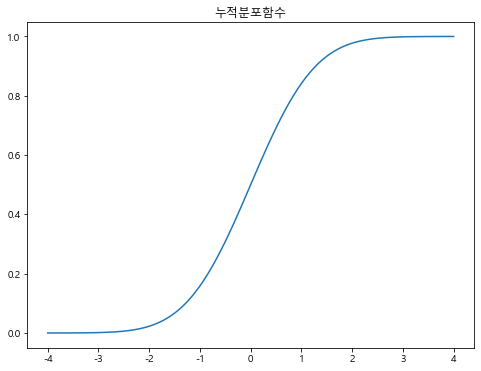

In [105]:
xx = np.linspace(-4,4,100)
cdf = rv.cdf(xx)

plt.figure(figsize=(8,6))
plt.plot(xx,cdf)
plt.title('누적분포함수')
# 그것을 누적으로 만든 누적분포함수

In [107]:
x_range = np.array([0,1])
def f(x):
    if x_range[0] <= x <=x_range[1]:
        return 2 * x
    else:
        return 0
    
X = [x_range, f]

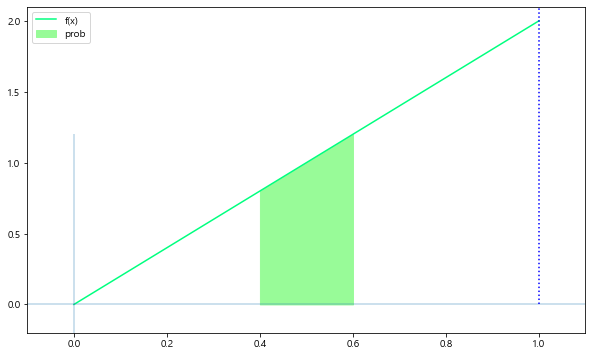

In [108]:
# y = 2x라는 함수식을 그려서 0.4에서 0.6사이의 면적을 구함
xs = np.linspace(x_range[0],x_range[1],100)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label="f(x)", color="springgreen")
ax.hlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(0,-0.2,1.2,alpha=0.3)
ax.vlines(xs.max(),0,2.2,linestyles=":",color="b")

xs = np.linspace(0.4,0.6,100)
ax.fill_between(xs,[f(x) for x in xs], label="prob", color="palegreen")

ax.set_xticks(np.arange(-0.2,1.3,0.2))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2,2.1)
ax.legend()

In [113]:
# 파이썬에서 적분으로 면적을 구해주는것이 integrate.quad
# 첫번째 인수는 피적분 함수와 범위 넣어주면 반한하는값, 두번째인수와 세번째 인수는 적분범위
integrate.quad(f, 0.4, 0.6) # quad 함수는 확률과 추정오차를 반환
# 앞에 값이 확률 추정오차

(0.19999999999999996, 2.2204460492503127e-15)

연속형 확률변수에서는 확률의 성질이 수식을 만족해야함
- f(x)가 항상 0이상의 값을 취함   = 확률은 음수일수 없다
- f(x)에 대하여 무한대 범위의 적분 결과는 1   = 확률의 합은 1
- 누적분포함수 맨끝에는 1 
- 확률밀도함수 안에 넓이는 1

In [114]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun # 함수의 최솟값은 fun이라는 인스턴스 변수로 구함

0

In [115]:
integrate.quad(f,-np.inf,np.inf)[0]

1.0

In [116]:
# 정규분포의 확률밀도 계산 
# 확률변수 3일때 확률밀도 N(3|4.0, 0.8**2)
x = 3
mu = 4
sigma = 0.8 

1/(np.sqrt(2* np.pi * sigma **2)) * sp.exp(-((x-mu)**2) / (2 * sigma**2))  # 수식에 집어넣어서 사용

0.22831135673627742

In [117]:
# 확률변수가 3일때의 퍼센트포인트 확률
stats.norm.pdf(loc=4,scale=0.8,x=3)

0.2283113567362774

In [118]:
# 표준정규분포에서 확률변수가 1일때의 확률밀도(확률)
stats.norm.pdf(loc=0,scale=1,x=1) # 표준정규분포에서 x가 1일때 값

0.24197072451914337

In [119]:
# 정규분포 인스턴스 생성 -> 객체를 만들어서 그 객체로 이용해서 구할수 있음
norm_dist = stats.norm(loc=4,scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

In [120]:
x_plot = np.arange(1,7.1,0.1)
x_plot

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

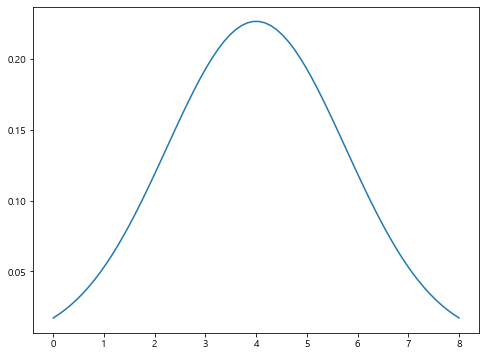

In [121]:
mu = np.mean(x_plot)
std = np.std(x_plot)
rv = stats.norm(loc = mu,scale = std)

xx = np.linspace(0,8,70)    # 0부터 8까지 70개로 나눔
pdf = rv.pdf(xx)

plt.figure(figsize=(8,6))
plt.plot(xx,pdf)

In [122]:
%%time
# 표본이 어떤값 이하가 되는 비율
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc = 4, scale=0.8,size=100000) # 기댓값 4 표준편차 0.8인 랜덤난수 100000개 생성
simulated_sample[:10]

Wall time: 5 ms


array([5.29947629, 3.51059487, 3.5774626 , 3.1416251 , 4.6923261 ,
       2.15876904, 5.39584941, 3.39103448, 4.25523128, 3.8005037 ])

In [127]:
import pandas as pd
df = pd.DataFrame(simulated_sample)
# df.head()
df.describe().round(3)

,0
count,100000.000
mean,4.004
std,0.799
min,0.538
25%,3.466
50%,4.005
75%,4.540
max,7.334


In [128]:
# Q. 3보다 작은 샘플의 합계와 3이하가 되는 확률
a = pd.Series(simulated_sample)
# a
a[a<=3].sum() # 3보다 작은 샘플의 합계

# print(df.loc[df[0]<=3].sum())
# print(len(df.loc[df[0]<=3])/len(simulated_sample))

0        5.299476
1        3.510595
2        3.577463
3        3.141625
4        4.692326
           ...   
99995    4.162717
99996    4.821552
99997    4.064980
99998    4.275237
99999    3.401955
Length: 100000, dtype: float64

In [129]:
len(simulated_sample)

100000

In [130]:
# 3보다 작은 샘플의 확률 -> 전체 샘플개수에서 3보다 작은 샘플의 개수 나누기
len(a[a<=3])/len(simulated_sample)

0.10371

In [131]:
#누적분포함수: 확률분포에서 얻은 확률변수 3이하가 되는 확률(loc=4,scale=0.8)
rv = stats.norm(loc=4,scale=0.8)
# rv=stats.norm.cdf(loc=4,scale=0.8, x=3) 평균 4 편차 0.8 일때 3이하가 될 확률
rv.cdf(3)

0.10564977366685535

In [132]:
# 정규분포는 평균에 대해 좌우대칭 
# 데이터가 평균값 이하가 될 확률은? 50%
rv = stats.norm.cdf(loc=4, scale=1 ,x=4)
rv

0.5